In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/5-Clustering/data/nigerian-songs.csv')
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [3]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [4]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


afro dancehall         328
afropop                 90
Missing                 53
nigerian pop            24
azontobeats              8
alternative r&b          7
indie r&b                4
afro r&b                 3
nigerian hip hop         3
gqom                     1
afroswing                1
bongo flava              1
south african house      1
hiplife                  1
highlife                 1
erotica                  1
soft rock                1
azonto                   1
christian afrobeat       1
Name: artist_top_genre, dtype: int64


Text(0.5, 1.0, 'Top genres')

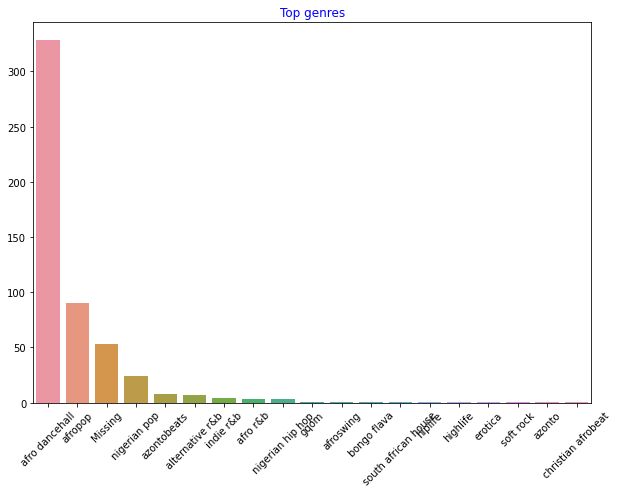

In [5]:
import seaborn as sns

top = df['artist_top_genre'].value_counts()
print(top)
plt.figure(figsize=(10,7))
sns.barplot(x=top[:].index, y=top[:].values)
plt.xticks(rotation=45)
plt.title('Top genres', color='blue')

Text(0.5, 1.0, 'Top genres')

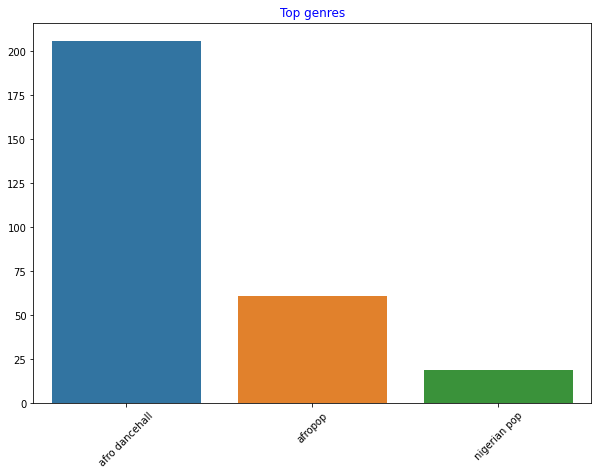

In [6]:
df = df[(df['artist_top_genre']=='afro dancehall') | (df['artist_top_genre']=='afropop') | (df['artist_top_genre']=='nigerian pop')]
df = df[(df['popularity']>0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10, 7))
sns.barplot(x=top.index, y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres', color='blue')

<AxesSubplot:>

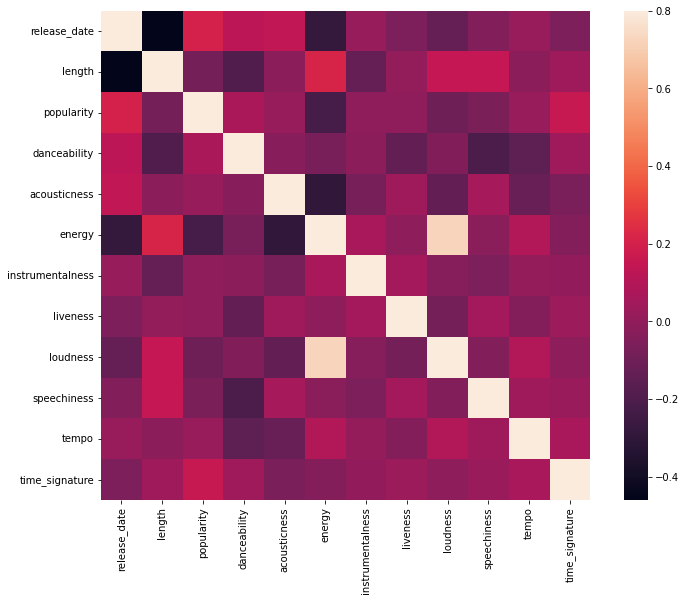

In [7]:
cormat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cormat, vmax=0.8, square=True)

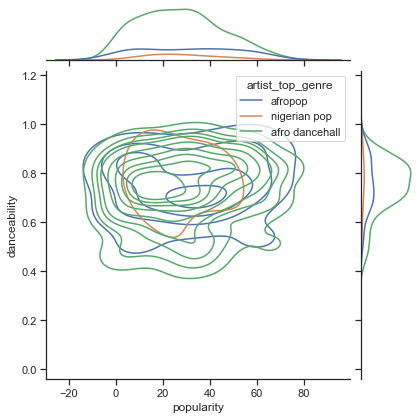

In [8]:
sns.set_theme(style='ticks')
g = sns.jointplot(data = df, x='popularity', y='danceability', hue='artist_top_genre', kind='kde')

c:\python\python3.9.2\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


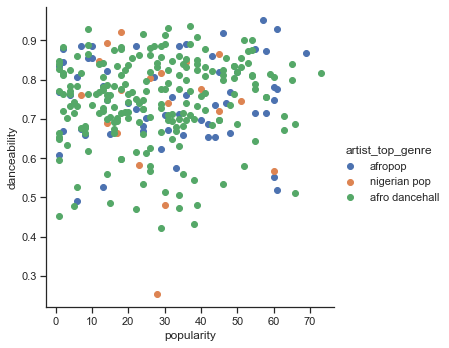

In [9]:
sns.FacetGrid(df, hue='artist_top_genre', size=5).map(plt.scatter, 'popularity', 'danceability').add_legend()

<AxesSubplot:xlabel='release_date'>

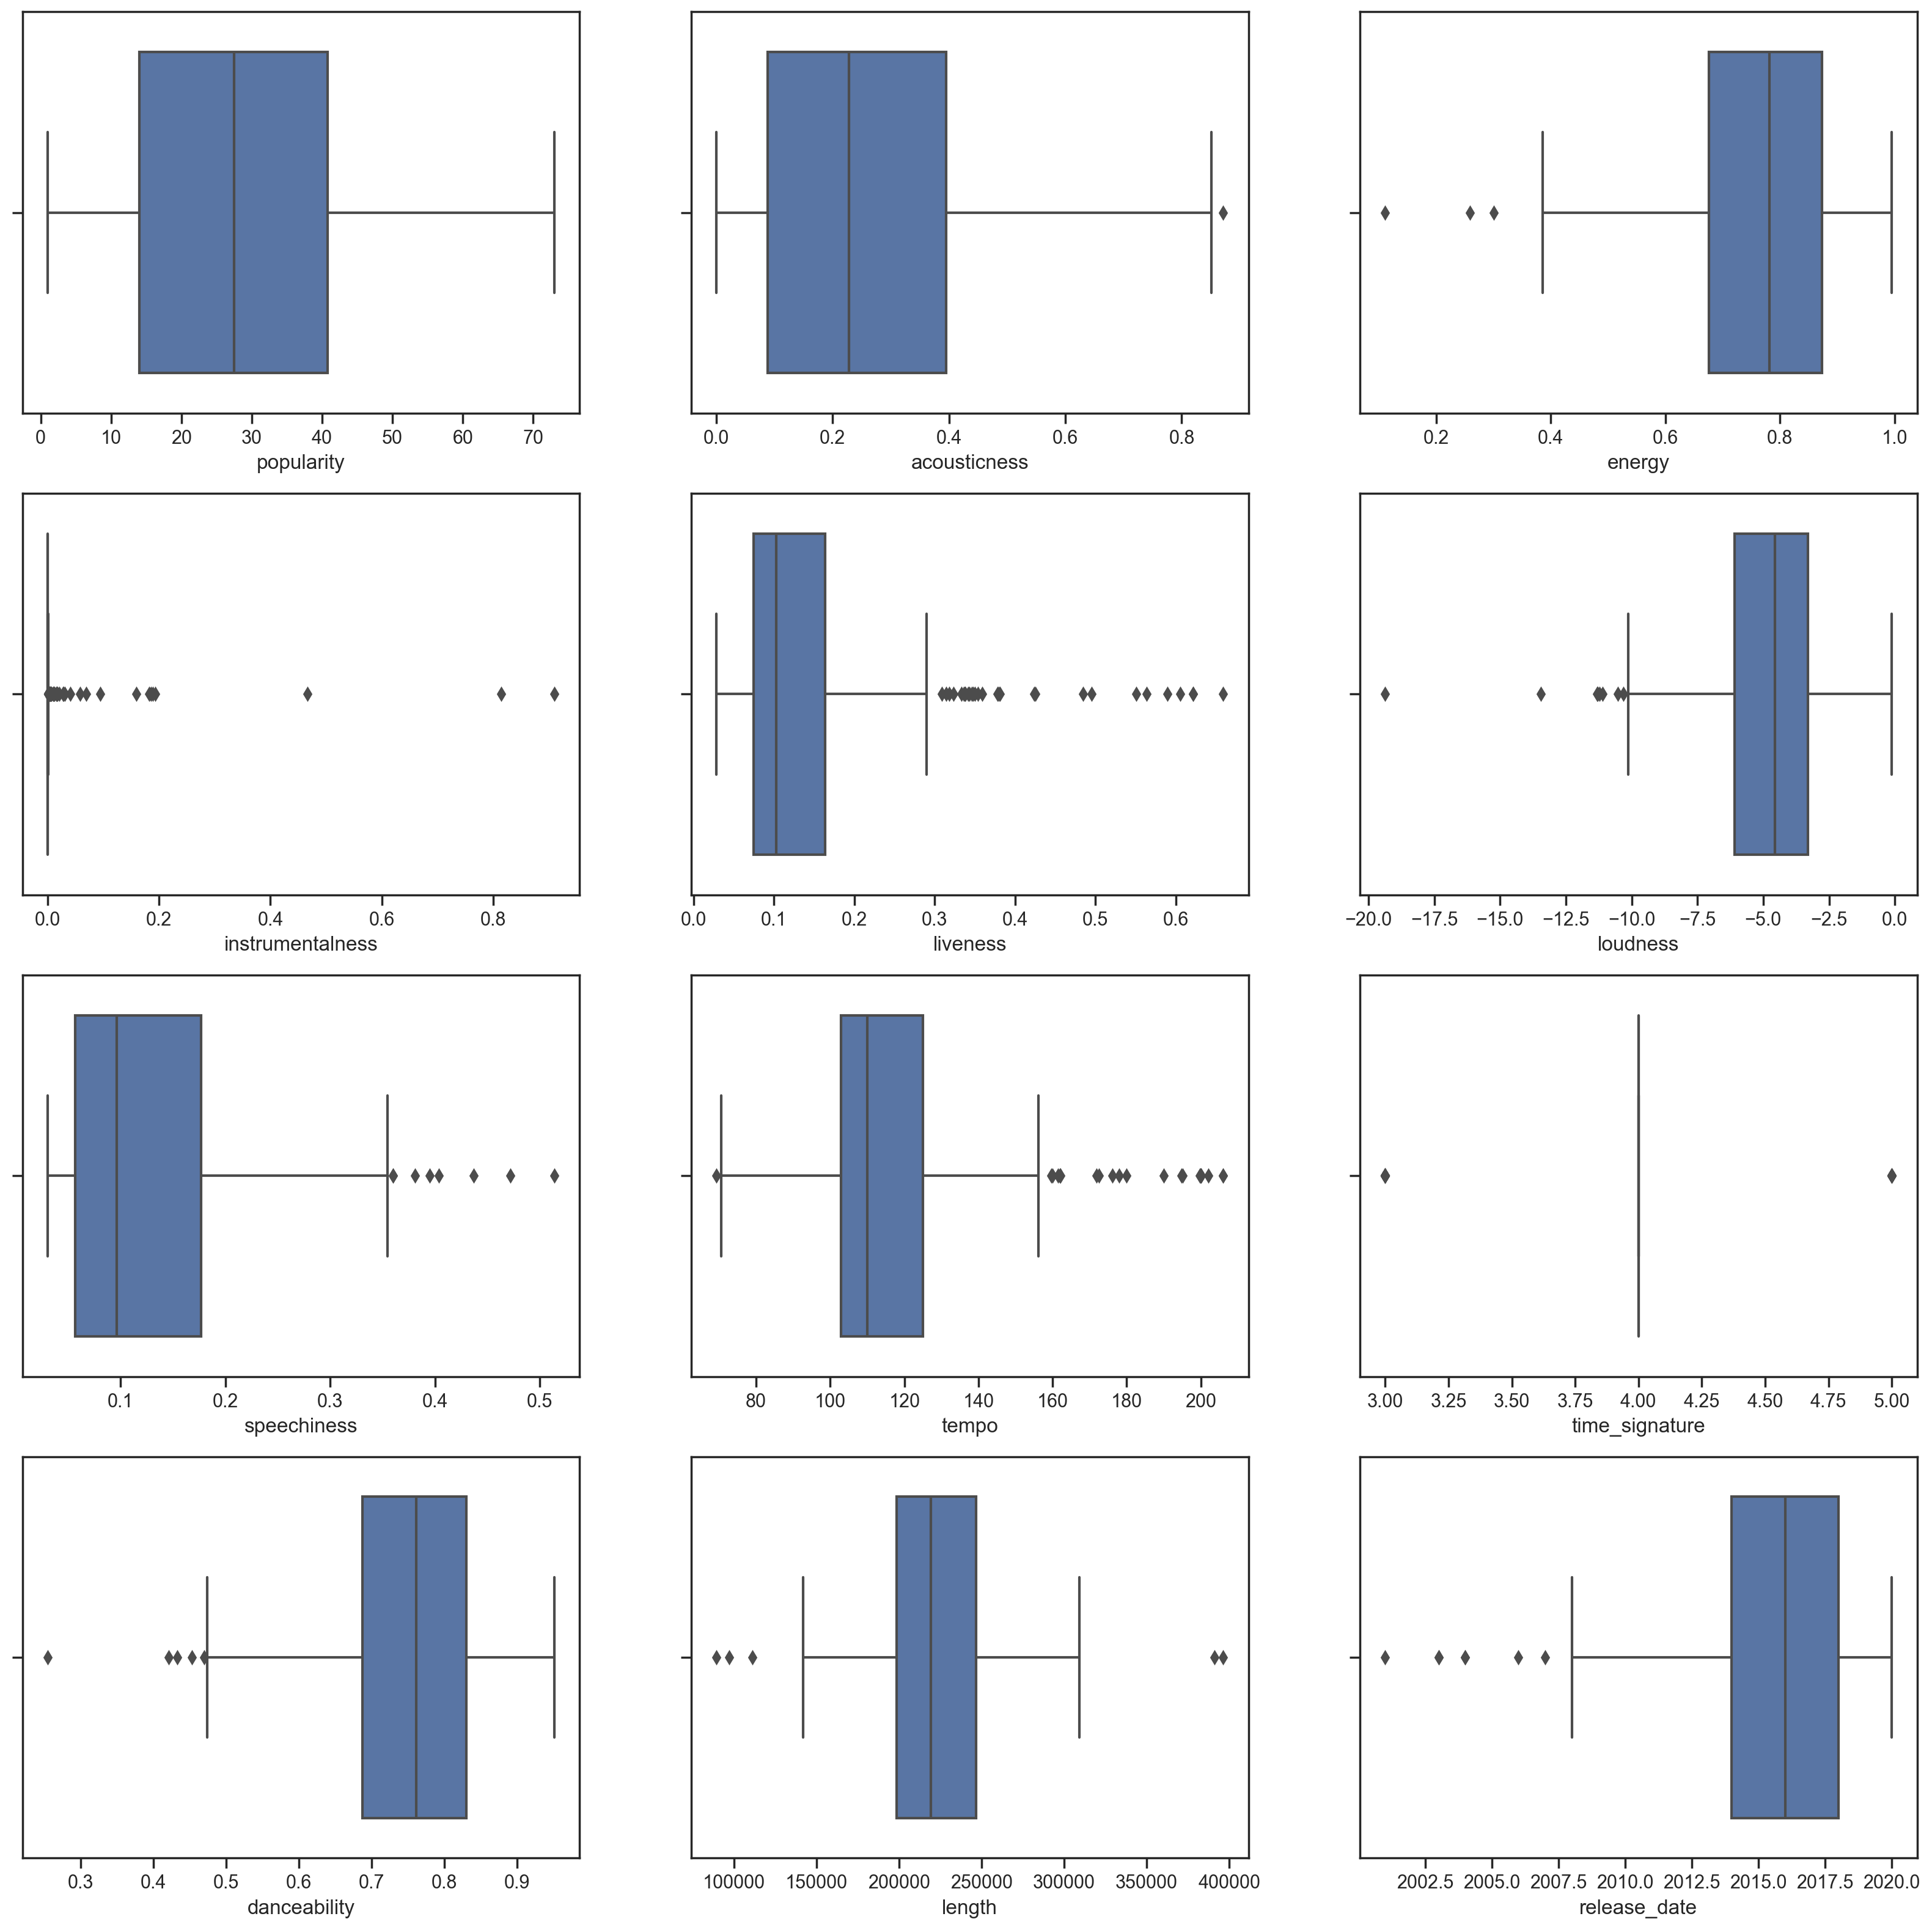

In [10]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.loc[:, ('artist_top_genre', 'popularity', 'danceability', 'acousticness', 'loudness', 'energy')]
y = df['artist_top_genre']
X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])
y = le.transform(y)

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km.fit(X)
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1])

In [13]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print('Silhouette Score: ', score)

Silhouette Score:  0.5466747351275563


In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Elbow method

c:\python\python3.9.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


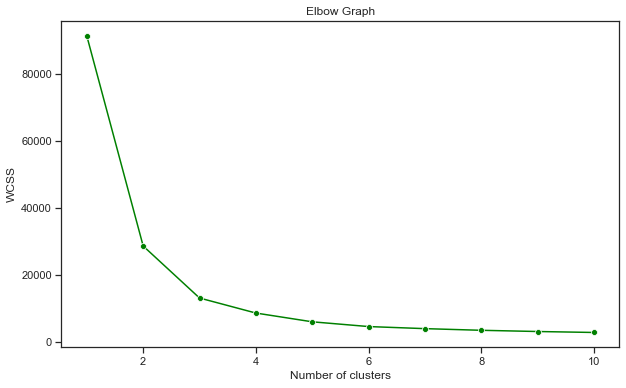

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(range(1,11), wcss, marker='o', color='green')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

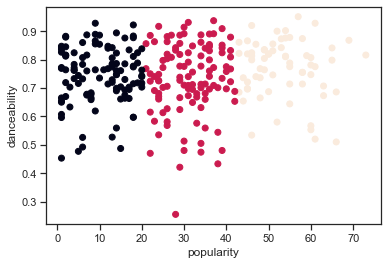

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'], c=labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [17]:
labels = kmeans.labels_
correct_labels = sum(y==labels)
print(f'Results: {correct_labels} samples were correctly labeled: {y.size}')
print('Accuracy Score: ', correct_labels/float(y.size))

Results: 105 samples were correctly labeled: 286
Accuracy Score:  0.36713286713286714


#### The model's accuracy is not very good.